In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import config
import numpy as np
import pandas as pd
import collections
import time
import config ## TODO decide whether to use this or not, or to provide some sort of different option for these variables.
import matplotlib.pyplot as plt


data = pd.read_csv("../datasets/kddcup_data_10_percent_corrected.csv", header = None)


df_results = pd.read_csv("../results_test/20190603-134042.csv")
print(df_results.head())
print(df_results.dtypes)

  predicted    readInTime  processTime  latency  Label
0   [11.00]  513990010703         1636   184549     11
1   [11.00]  513990112842         1150    83594     11
2   [11.00]  513990113235         2737    85942     11
3   [11.00]  513990212077         1655     2169     11
4   [17.00]  513990214589         2480     2501     17
predicted      object
readInTime      int64
processTime     int64
latency         int64
Label           int64
dtype: object


In [2]:


    #####
    ##### Metric Calculation Section
    #####

def caclulateErr(results, Print=False):
    df =pd.DataFrame()
    df["result"] = results["predicted"].str.strip("[]")
    df["truth"] = results["Label"]
    df['result'] = df['result'].astype(np.float64)
    df['truth'] = df['truth'].astype(np.float64)
    res =df.loc[~(df['result'] == df['truth'])]
    output ="error rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)
    return output


def caclulateLatency(results, vRate=None, Print=False):
    df =pd.DataFrame()    
    df['latency'] = results['latency'].astype(np.float64)
    #if isinstance(le_list,(,)):
    #df['vRate'] = vRate
    res =df.loc[~(df['latency'] >= config.LATENCYBOUND)]
    output ="exceed rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)

    vFig =plt.figure()
    vAx = vFig.add_subplot(1,1,1)
    vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
    vAx.plot(vRate)

    return output



In [3]:
# vRate=np.linspace(1,100,100)
# vRate=np.append(vRate,np.linspace(100,1,100))
# print(vRate)
# #print(len(vYRate)* config.READERINTERVAL)
# print(config.READERINTERVAL)

# vYRate = np.arange(0,len(vRate)* config.READERINTERVAL,config.READERINTERVAL)
# vYRate = vYRate.ravel()
# print(vYRate)

vRate=np.linspace(1,10,100)
vRate = np.append(vRate, np.linspace(10,1,100))
vRate = np.append(vRate,np.linspace(1,10,100))
vRate = np.append(vRate,np.linspace(10,1,100))
vRate = np.append(vRate,np.linspace(1,10,100))
vRate = np.append(vRate,np.linspace(10,1,100))
print(vRate)

[  1.           1.09090909   1.18181818   1.27272727   1.36363636
   1.45454545   1.54545455   1.63636364   1.72727273   1.81818182
   1.90909091   2.           2.09090909   2.18181818   2.27272727
   2.36363636   2.45454545   2.54545455   2.63636364   2.72727273
   2.81818182   2.90909091   3.           3.09090909   3.18181818
   3.27272727   3.36363636   3.45454545   3.54545455   3.63636364
   3.72727273   3.81818182   3.90909091   4.           4.09090909
   4.18181818   4.27272727   4.36363636   4.45454545   4.54545455
   4.63636364   4.72727273   4.81818182   4.90909091   5.           5.09090909
   5.18181818   5.27272727   5.36363636   5.45454545   5.54545455
   5.63636364   5.72727273   5.81818182   5.90909091   6.           6.09090909
   6.18181818   6.27272727   6.36363636   6.45454545   6.54545455
   6.63636364   6.72727273   6.81818182   6.90909091   7.           7.09090909
   7.18181818   7.27272727   7.36363636   7.45454545   7.54545455
   7.63636364   7.72727273   7.818181

lastrow 3299.0 datasize 80000
smaller


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


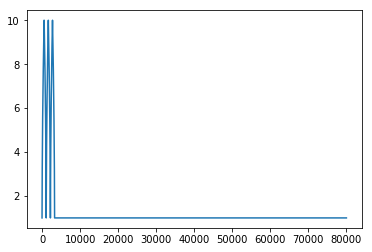

In [4]:
def expandVRate(vRate, data):
    valSum=0;
    newVRate =pd.DataFrame()
    addonRate = pd.DataFrame()
    newVRate['vRate'] = vRate
    newVRate['vInterval'] = np.nan
    for i in range(len(vRate)):
#         print(i)
        newVRate['vInterval'][i] = valSum
#         print("val:{}".format(newVRate['vRate'][i]))
        valSum += newVRate['vRate'][i]
    lastRow = newVRate.iloc[-1]
    print("lastrow {} datasize {}".format(lastRow['vInterval'],len(data)))
    dataSize = len(data)
    if lastRow['vInterval'] < dataSize:        
        print("smaller")
#         if lastRow['vRate'] > 0:
#             while valSum < dataSize:
#                 valSum += lastRow['vRate']
#                 addonRate = addonRate.append( {"vRate":lastRow['vRate'],"vInterval":valSum}, ignore_index=True)            
#         else:
#             addonRate = addonRate.append( {"vRate":lastRow['vRate'],"vInterval":dataSize}, ignore_index=True)            
        addonRate = addonRate.append( {"vRate":lastRow['vRate'],"vInterval":dataSize}, ignore_index=True)            
        newVRate = newVRate.append(addonRate)

        
    elif lastRow['vInterval'] > len(data):
        #loop through the vRate to find the point that matches the size of results. slice the vRate at that point.
        #actually just c
        print("larger")
#       print("newRate {}".format(newVRate))
        maxLen = len(data)        
        for i in range(maxLen):            
            if newVRate['vInterval'][i] > maxLen:
                print("larger then")
                #slice here and add new ending point of the vRate with interval equal to maxlen
                newVRate = newVRate.iloc[0:i]
                print(newVRate)
                newVRate = newVRate.append({"vRate":newVRate['vRate'][i-1],"vInterval":maxLen}, ignore_index=True)
                break
            elif newVRate['vInterval'][i] == maxLen:
                print("same size")
                #slice directly here
                newVRate = newVRate.iloc[0:i]    
                break            
    return newVRate 

# print(expandVRate(vRate, df_results))
fig2 = plt.figure()
newRate = expandVRate(vRate, df_results)
# print(newRate.head())
plt.plot(newRate['vInterval'],newRate['vRate'])

lastrow 3299.0 datasize 80000
smaller


0

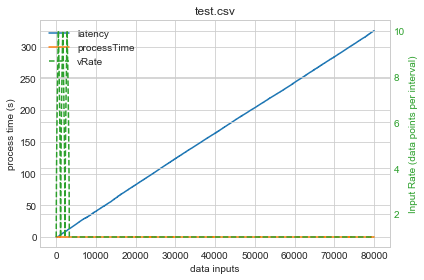

In [19]:
from datetime import datetime, timedelta
epoch = datetime(1601, 1, 1)

newVRate = expandVRate(vRate, df_results)

def visualizeResults(vRate, data, fileName = ""):
    fig, ax1 = plt.subplots()
    
    # ax = plt.axes()
    if fileName != "":
        plt.title(fileName)
        fig.num="test"
    color = 'tab:blue'
    ax1.set_xlabel('data inputs')
    ax1.set_ylabel('process time (s)')
    lns1 = ax1.plot(data['latency'].astype(np.float64) /1000000)
    lns2 = ax1.plot(data['processTime'].astype(np.float64)/1000000)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:green'
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel('Input Rate (data points per interval)', color=color)
    lns3 = ax2.plot(vRate['vInterval'],vRate['vRate'], color=color, linestyle = 'dashed')
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    ## added these three lines
    lns = lns1+lns2+lns3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)

    plt.plot()
    return 0

visualizeResults(newVRate, df_results, "test.csv")
# ax.plot(vYRate)

# ax2 = ax.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, vYRate, color=color)
# ax2.tick_params(axis='y', labelcolor=color)


[ 0.          0.01000984  0.02001868  0.03002552  0.04002934  0.05002916
  0.06002396  0.07001275  0.07999452  0.08996827  0.09993302  0.10988774
  0.11983146  0.12976317  0.13968188  0.14958659  0.15947632  0.16935006
  0.17920684  0.18904566  0.19886554  0.20866549  0.21844453  0.22820168
  0.23793597  0.24764642  0.25733206  0.26699191  0.276625    0.28623038
  0.29580708  0.30535414  0.3148706   0.32435552  0.33380793  0.3432269
  0.35261147  0.36196071  0.37127369  0.38054946  0.3897871   0.39898569
  0.4081443   0.41726201  0.42633791  0.4353711   0.44436066  0.45330569
  0.46220531  0.47105861  0.47986471  0.48862273  0.49733179  0.50599102
  0.51459954  0.52315651  0.53166105  0.54011232  0.54850948  0.55685167
  0.56513807  0.57336784  0.58154016  0.58965421  0.59770917  0.60570425
  0.61363863  0.62151153  0.62932216  0.63706972  0.64475345  0.65237258
  0.65992634  0.66741398  0.67483474  0.68218788  0.68947267  0.69668838
  0.70383427  0.71090964  0.71791378  0.72484599  0.

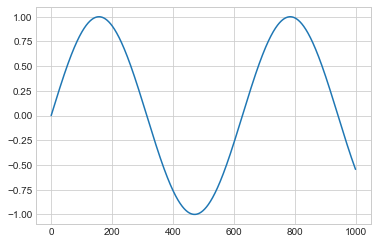

In [6]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 1000)
X = np.sin(x)
fig = plt.figure()
ax = plt.axes()
ax.plot(np.sin(x))
print(X)

(600,)
(1,)


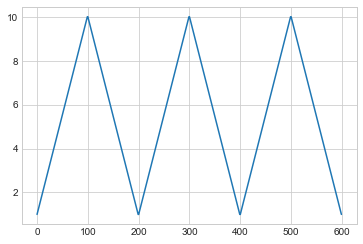

In [7]:
vFig =plt.figure()
vAx = vFig.add_subplot(1,1,1)
vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
print(vRate.shape)
print(vYRate.shape)
vAx.plot(vRate)

'exceed rate: 0.22125%'

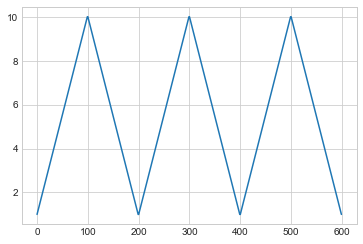

In [8]:
caclulateErr(df_results)
caclulateLatency(df_results, vRate)